In [1]:
suppressMessages(library(data.table))
suppressMessages(library(ggplot2))
suppressMessages(library(matrixStats))
suppressMessages(library(ggsci))
suppressMessages(library(magrittr))
suppressMessages(library(ggrepel))
suppressMessages(library(dplyr))
suppressMessages(library(ComplexHeatmap))
suppressMessages(library(ggpubr))
suppressMessages(library(circlize))
suppressMessages(library(hrbrthemes))

confidence_interval_upper <- function(vector, interval=0.95) {
  # Standard deviation of sample
  vec_sd <- sd(vector, na.rm = TRUE)
  # Sample size
  n <- length(vector)
  # Median of sample
  vec_mean <- mean(vector, na.rm = TRUE)
  # Error according to t distribution
  error <- qt((interval + 1)/2, df = n - 1) * vec_sd / sqrt(n)
  # Confidence interval as a vector
  result <- vec_mean + error
  return(result)
}
confidence_interval_lower <- function(vector, interval=0.95) {
  # Standard deviation of sample
  vec_sd <- sd(vector, na.rm = TRUE)
  # Sample size
  n <- length(vector)
  # Median of sample
  vec_mean <- mean(vector, na.rm = TRUE)
  # Error according to t distribution
  error <- qt((interval + 1)/2, df = n - 1) * vec_sd / sqrt(n)
  # Confidence interval as a vector
  result <- vec_mean - error
  return(result)
}
createEmptyDf = function( nrow, ncol, colnames = c() ){
  if( missing( ncol ) && length( colnames ) > 0 ){
    ncol = length( colnames )
  }
  data.frame( matrix( vector(), nrow, ncol, dimnames = list( c(), colnames ) ) )
}

In [2]:
setwd("/Users/inamojun/TMDU-LR_isoform_atlas/Figures")

In [3]:
#load data
load("../data/data_Fig03.RData")

In [4]:
# head(out)

In [5]:
# head(mat_var) # top 5000 high variable isoforms among cell types after normalizing by Read Per Million
# dim(mat_var)

In [18]:
# head(mat) # specific isoforms after normalizing by Read Per Million
# dim(mat)

In [7]:
# head(col_lab) # with label
# dim(col_lab)

In [8]:
# head(elavl) # ELAVL1 RIP-seq peaks and their region, isoform expression of RNA-seq derived from relevant cells (LCL, GEUVADIS)
# dim(elavl)

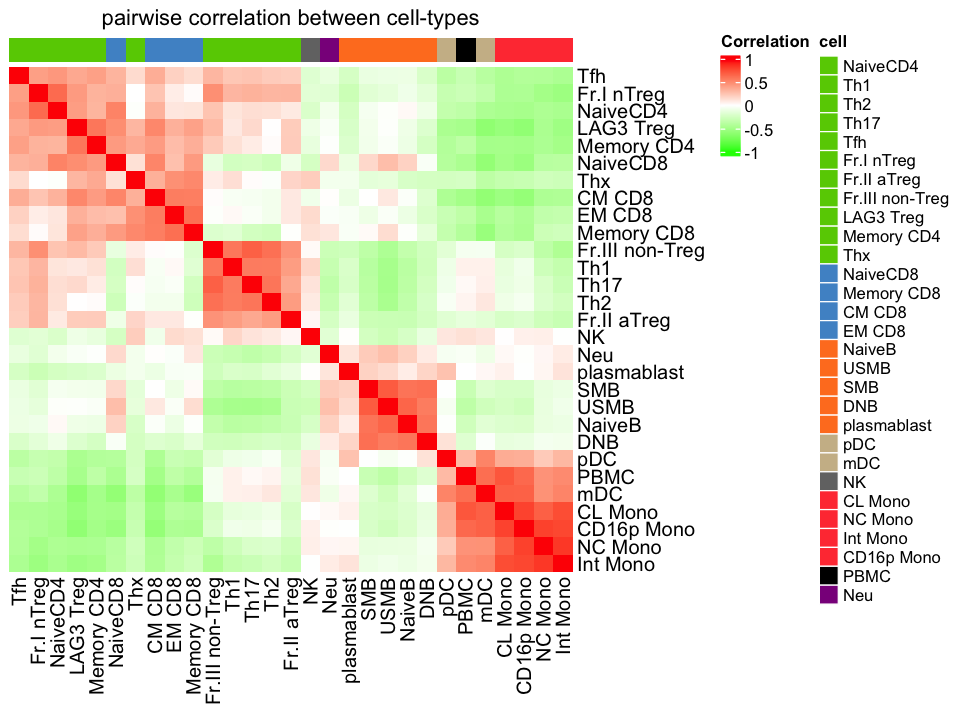

In [9]:
# hirarchial clustering by expression correlation among cell types using the top 5000 variable isoforms
ha = HeatmapAnnotation(cell = factor(colnames(mat_var), levels = colnames(mat_var)),
                       col = list(cell = c("NaiveCD4" = "chartreuse3","Th1" = "chartreuse3","Th2" = "chartreuse3","Th17" = "chartreuse3","Tfh" = "chartreuse3","Fr.I nTreg" = "chartreuse3","Fr.II aTreg" = "chartreuse3","Fr.III non-Treg" = "chartreuse3","LAG3 Treg" = "chartreuse3","Memory CD4" = "chartreuse3","Thx" = "chartreuse3",
                                           "NaiveCD8" = "steelblue3","Memory CD8" = "steelblue3","CM CD8" = "steelblue3","EM CD8" = "steelblue3",
                                           "NaiveB" = "chocolate1","USMB" = "chocolate1","SMB" = "chocolate1","DNB" = "chocolate1","plasmablast" = "chocolate1",
                                           "pDC" = "wheat3","mDC" = "wheat3",
                                           "NK" = "grey45",
                                           "CL Mono" = "brown1","NC Mono" = "brown1","Int Mono" = "brown1","CD16p Mono" = "brown1",
                                           "PBMC" = "black",
                                           "Neu" = "darkmagenta")),
                       show_annotation_name = FALSE)
                
options(repr.plot.width=8, repr.plot.height=6)
Heatmap(cor(mat_var), name = "cor", 
        top_annotation = ha,
        col = circlize::colorRamp2(c(-1, 0, 1), c("green", "white", "red")), 
        show_row_names = TRUE, show_column_names = TRUE, show_row_dend = FALSE, show_column_dend = FALSE, 
        column_title = "pairwise correlation between cell-types",
        heatmap_legend_param = list(title = "Correlation"))

`use_raster` is automatically set to TRUE for a matrix with more than
2000 columns You can control `use_raster` argument by explicitly
setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



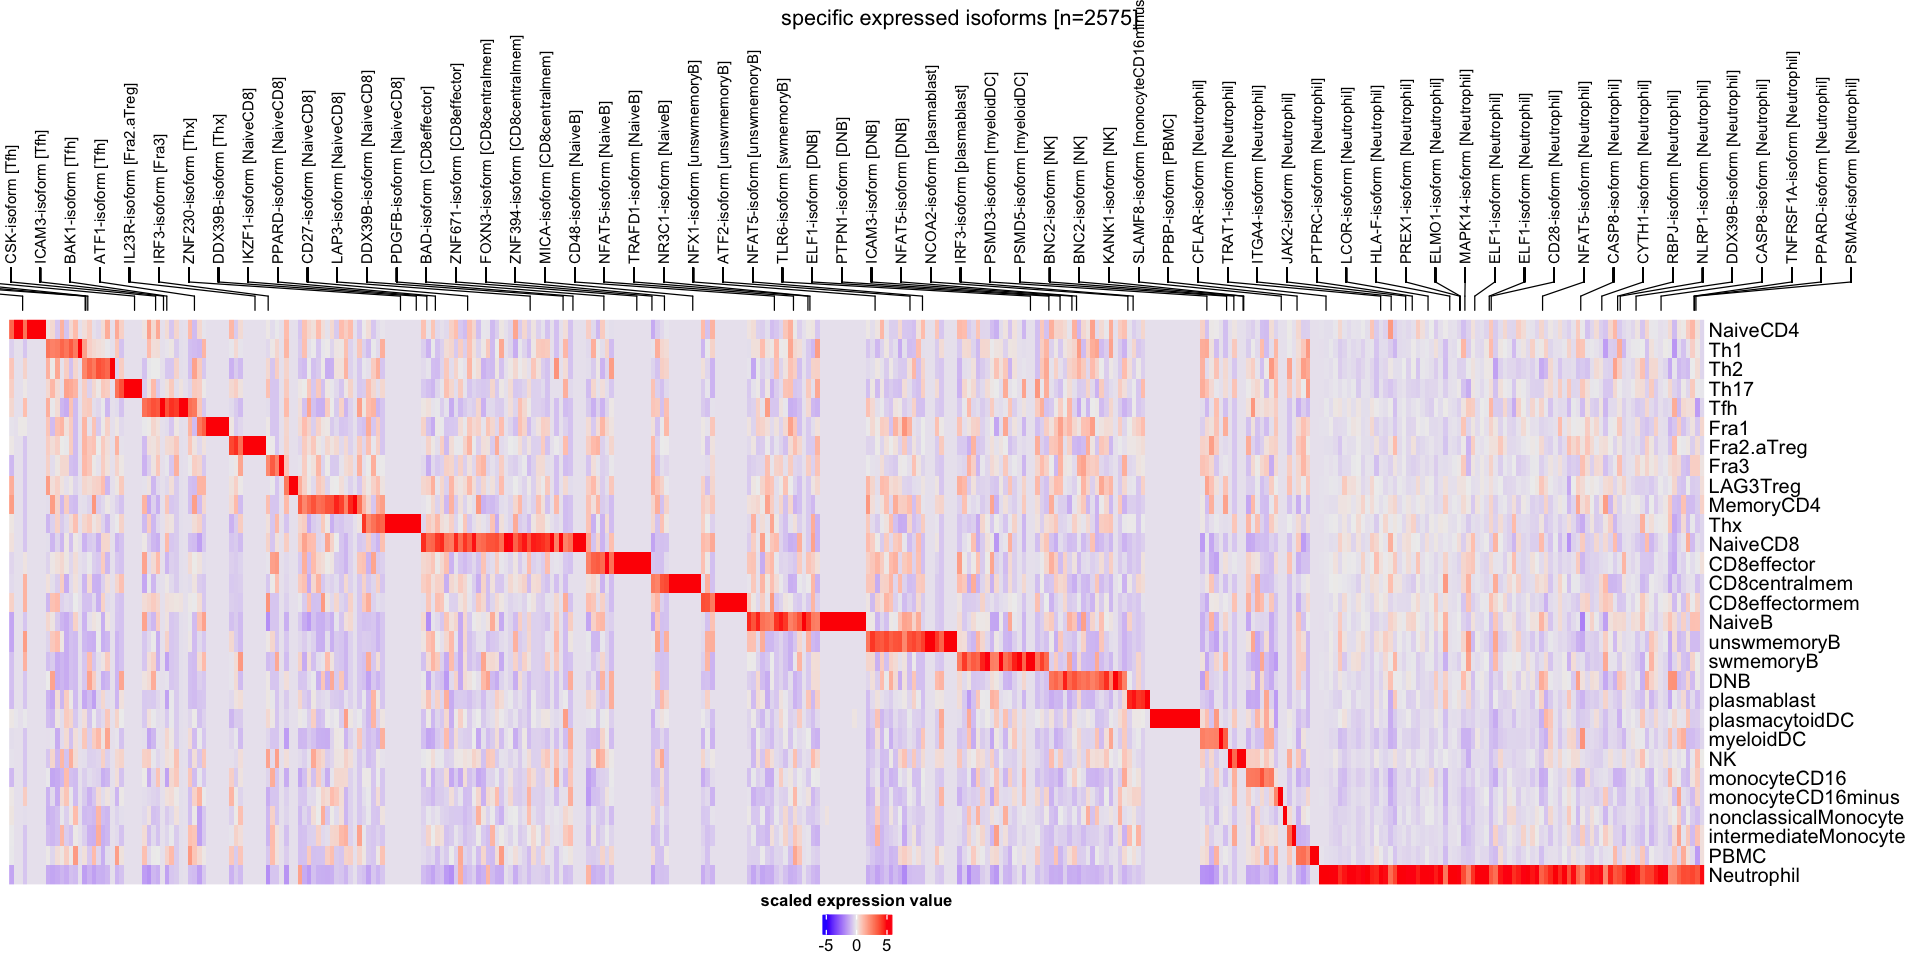

In [10]:
# specific isoforms

options(repr.plot.width=16, repr.plot.height=8)
# gwas_genes: efotraits_EFO_0000540-associations-2022-06-14.csv

ht_list = 
  HeatmapAnnotation(
    label = anno_mark(at = which(col_lab$immune_or_TF & col_lab$associated_gene %in% gwas_genes), 
                      labels = col_lab[col_lab$immune_or_TF & col_lab$associated_gene %in% gwas_genes, ]$id, 
                      side = "top",
                      labels_gp = gpar(fontsize = 9
                                       # col = rep(c("palegreen","palegreen3","palegreen4","chartreuse","chartreuse3","chartreuse4","green1","green3","olivedrab1","olivedrab2","olivedrab3",
                                       #             "steelblue1","steelblue2","steelblue3","steelblue4",
                                       #             "wheat1","wheat2","wheat3",
                                       #             "grey90",
                                       #             "brown1","brown2","brown3","brown4",
                                       #             "black",
                                       #             "darkmagenta"),each=3)
                      ), 
                      padding = 0,
                      link_width = unit(0.01, "mm"),
                      link_height = unit(10, "mm")
    )) %v%
  Heatmap(scale(t(mat)), 
          cluster_columns = FALSE, show_column_names = FALSE, show_column_dend = FALSE,
          cluster_rows = FALSE, 
          row_names_gp = gpar(fontsize = 12, axis = 45),
          heatmap_legend_param = list(
            # at = c(-2, 0, 2),
            # labels = c("low", "zero", "high"),
            title = "scaled expression value",
            legend_height = unit(4, "cm"),
            direction = "horizontal",
            title_position = "topcenter") 
  ) 
draw(column_title = paste0("specific expressed isoforms [n=",nrow(mat),"]"), ht_list, heatmap_legend_side="bottom")

Warning message:
“Removed 23714 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 23714 rows containing non-finite values (stat_compare_means).”
Warning message:
“Removed 23714 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 23714 rows containing non-finite values (stat_compare_means).”
Warning message:
“Removed 23714 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 23714 rows containing non-finite values (stat_compare_means).”
Warning message:
“Removed 23714 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 23714 rows containing non-finite values (stat_compare_means).”


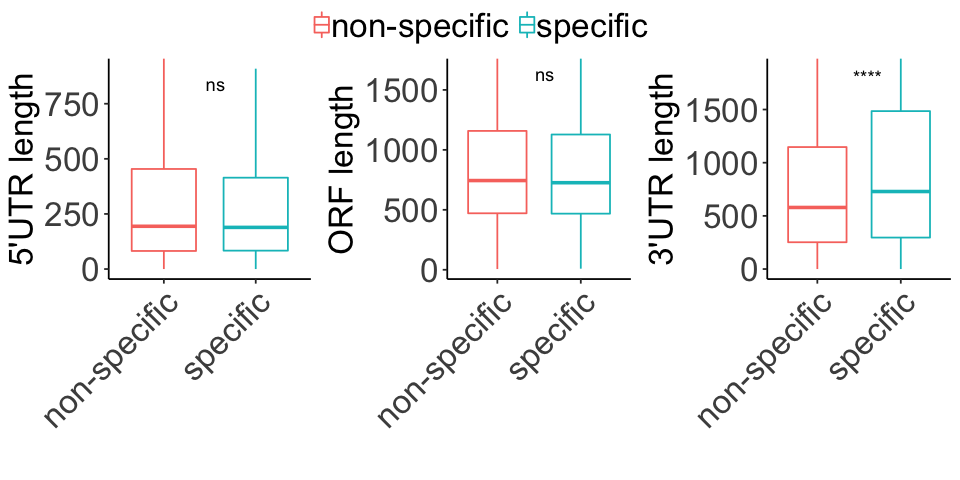

In [11]:
# compare length between specific isoforms and non-specific isoforms
options(repr.plot.width=8, repr.plot.height=4)
# compare length
variable = "specificity_LR"
for (region in c("five_utr_length","CDS_length","three_utr_length")){
  lab = dplyr::case_when(
    region == "five_utr_length" ~ "5'UTR length",
    region == "CDS_length" ~ "ORF length",
    region == "three_utr_length" ~ "3'UTR length"
  )
  g = out %>%
    dplyr::mutate(strata = eval(parse(text = variable)),
                  strata = dplyr::case_when(
                    strata ~ "specific",
                    !strata ~ "non-specific"
                  )) %>%
    ggboxplot(., x="strata", y=region,
              color = "strata",
              outlier.shape = NA) + 
    coord_cartesian(ylim = quantile(eval(parse(text=paste0("out$",region))), c(0, 0.9), na.rm=TRUE)) +
    stat_compare_means(
      label = "p.signif",
      label.y = quantile(eval(parse(text=paste0("out$",region))), 0.88, na.rm=TRUE),
      label.x.npc = "center") + 
    theme_classic() +
    ylab(lab) +
    xlab("") +
    theme(strip.text.x=element_text(size=9, color="black", face="bold"),
          strip.text.y=element_text(size=9, color="black", face="bold"),
          legend.position = "bottom",
          plot.title = element_text(size=20),
          axis.title.x = element_text(size=20),
          axis.title.y = element_text(size =20),
          axis.text.y = element_text(size = 20),
          axis.text.x = element_text(size = 20,angle = 45, hjust=1),
          legend.text =  element_text(size = 20), 
          legend.key.size = grid::unit(0.8, "lines"),
          legend.title = element_text(size = 0, hjust = 0))
  assign(paste0("g_",region),g)
}

ggpubr::ggarrange(g_five_utr_length,g_CDS_length,g_three_utr_length,ncol=3,common.legend = TRUE)

In [12]:
# enrichment of RBP binding motif by RBPmap
## specific isoforms and others (LR cell-types, SR cell-types, SR stimulus)
## translational efficiency top10 vs bottom10)

length(unique(pval_rbp$RBP)) # total number of tested RBP

# ELAVL1
pval_rbp %>%
  dplyr::filter(RBP=="HuR") %>%
  dplyr::arrange(-CI_up)

[1] 132

RBP,chi_pval,proportion,fold,odds,CI_low,CI_up,strata,region
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
HuR,1.695455e-125,"bottom10: 63.15,others: 79.13,top10:108.55",0.5817116,1.7190656,1.6413194,1.8003825,te_rank,3UTR
HuR,6.982415e-32,"FALSE:47.18,TRUE:75.53",0.6246448,1.6009272,1.4778756,1.7337880,specificity_SR_stim,CDS
HuR,1.851909e-30,"FALSE: 78.90,TRUE:118.81",0.6640217,1.5059504,1.4028698,1.6168342,specificity_SR_stim,3UTR
HuR,4.028083e-09,"FALSE:18.50,TRUE:26.05",0.7099577,1.4085286,1.2533622,1.5798002,specificity_SR_stim,5UTR
HuR,5.010927e-04,"FALSE:18.54,TRUE:24.68",0.7515222,1.3306284,1.1285508,1.5625551,specificity_SR_celltype,5UTR
HuR,1.298603e-67,"FALSE: 78.25,TRUE:116.07",0.6741422,1.4833418,1.4181573,1.5515666,specificity_LRgroup,3UTR
HuR,3.153813e-22,"FALSE: 78.90,TRUE:106.52",0.7407246,1.3500147,1.2697644,1.4353584,specificity_LR,3UTR
HuR,2.002070e-22,"FALSE:1733.46,TRUE:2253.69",0.7691666,1.3001232,1.2330499,1.3716886,specificity_SR_stim,total
HuR,6.900757e-20,"FALSE:1588.89,TRUE:2033.29",0.7814381,1.2797080,1.2135625,1.3502687,specificity_SR_stim,Intron


In [13]:
# IGF2BP3
## Insulin-like growth factor 2 mRNA-binding protein 3 is a protein that in humans is encoded by the IGF2BP3 gene.
## The protein encoded by this gene is primarily found in the nucleolus, where it can bind to the 5' UTR of the insulin-like growth factor II leader 3 mRNA and may repress translation of insulin-like growth factor II during late development.
pval_rbp %>%
  dplyr::filter(RBP=="IGF2BP3") %>%
  dplyr::filter(strata=="te_rank") %>%
  dplyr::arrange(-CI_up)

RBP,chi_pval,proportion,fold,odds,CI_low,CI_up,strata,region
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
IGF2BP3,9.214612e-110,"bottom10:27.67,others:40.13,top10:54.05",0.5120040,1.9530737,1.8402179,2.0732535,te_rank,3UTR
IGF2BP3,7.033705e-16,"bottom10:37.48,others:44.63,top10:46.45",0.8069225,1.2392585,1.1705684,1.3120385,te_rank,CDS
IGF2BP3,3.440789e-72,"bottom10:629.76,others:789.80,top10:764.37",0.8238843,1.2137561,1.1744349,1.2544975,te_rank,total
IGF2BP3,1.165976e-77,"bottom10:549.32,others:695.44,top10:659.97",0.8323442,1.2014200,1.1621215,1.2420904,te_rank,Intron
IGF2BP3,1.126658e-109,"bottom10:15.28,others: 9.60,top10: 3.91",3.9110452,0.2556872,0.2243935,0.2907307,te_rank,5UTR


[1] "specificity_LR"
[1] "specificity_LRgroup"
[1] "specificity_SR_celltype"
[1] "specificity_SR_stim"
[1] "te_rank"


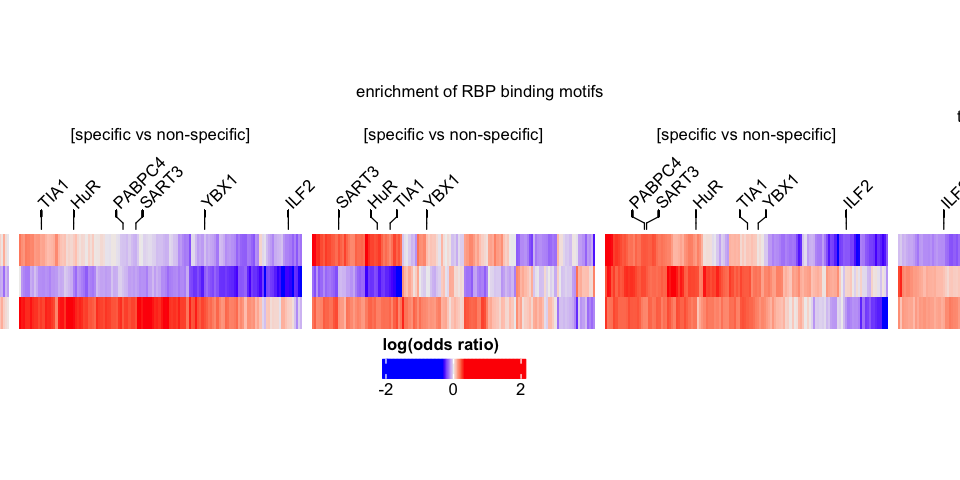

In [14]:
options(repr.plot.width=8, repr.plot.height=4)

variable="specificity_LR"
genes=c("HuR",InnateDB)
# variable="specificity_SR_celltype"
# variable="specificity_SR_stim"
# variable="InnateDB"
# variable="te_rank"
variables=c("specificity_LR","specificity_LRgroup","specificity_SR_celltype","specificity_SR_stim","te_rank")
for (variable in variables){
  print(variable)
  mat = pval_rbp %>%
    dplyr::filter(region != "total") %>%
    dplyr::filter(strata == variable) %>%
    dplyr::mutate(log_odds = log(odds),
                  region = factor(region,levels=c("Intron","3UTR","CDS","5UTR","total"))
    ) %>%
    dplyr::select(c(log_odds,region,RBP)) %>%
    tidyr::pivot_wider(names_from = "RBP",
                       values_from = "log_odds") %>%
    as.data.frame() %>%
    tibble::column_to_rownames("region") %>%
    as.matrix()
  dim(mat)
  lab = dplyr::case_when(
    variable == "specificity_LR" ~ paste0("[specific vs non-specific]"),
    variable == "specificity_LRgroup" ~ paste0("[specific vs non-specific]"),
    variable == "specificity_SR_celltype" ~ paste0("[specific vs non-specific]"),
    variable == "specificity_SR_stim" ~ paste0("[specific vs non-specific]"),
    variable == "te_rank" ~ paste0("translational efficiency\n[top10 vs bottom10]"))
  anno_label = pval_rbp %>%
    dplyr::filter(region != "total") %>%
    dplyr::filter(strata == variable) %>%
    dplyr::mutate(sig = ifelse(CI_up<1 | CI_low>1, TRUE, FALSE),
                  interest = ifelse(RBP %in% genes, TRUE, FALSE)) %>%
    dplyr::group_by(RBP) %>%
    dplyr::mutate(sig = ifelse(any(sig), TRUE, FALSE)) %>%
    as.data.frame() %>%
    dplyr::distinct(RBP,sig,interest) %>%
    magrittr::set_rownames(.$RBP) %>%
    .[colnames(mat),]
  show_heatmap_legend = ifelse(variable == "specificity_LR", TRUE, FALSE)
  mat = mat[c("5UTR","CDS","3UTR"),]
  ht_list = 
    Heatmap(mat, 
            top_annotation = HeatmapAnnotation(mark = anno_mark(at = which(anno_label$interest & anno_label$sig), 
                                                                labels = anno_label[anno_label$interest & anno_label$sig, ]$RBP, 
                                                                side = "top",
                                                                labels_rot = 45,
                                                                labels_gp = gpar(fontsize = 10), 
                                                                link_width = unit(5, "mm"), 
                                                                padding = unit(3, "mm")
            )),
            cluster_columns = TRUE, show_column_names = FALSE, show_column_dend = FALSE,
            cluster_rows = FALSE, show_row_names = TRUE, show_row_dend = FALSE, 
            row_names_gp = gpar(fontsize = 10, axis = 0),
            column_title = lab, 
            column_title_side = "top",
            column_title_gp = gpar(fontsize = 10, axis = 45),
            show_heatmap_legend = show_heatmap_legend,
            heatmap_legend_param = list(
              at = c(-2, 0, 2),
              # labels = c("low", "zero", "high"),
              title = "log(odds ratio)",
              legend_height = unit(4, "cm"),
              legend_width = unit(3, "cm"),
              legend_side = "bottom",
              direction = "horizontal") , 
            width = unit(6, "cm"),
            height = unit(2, "cm")
    )
  assign(paste0("ht_list_",variable),ht_list)
}

draw(column_title = "enrichment of RBP binding motifs", 
     column_title_gp = gpar(fontsize = 10, axis = 45),
     ht_list_specificity_LR + 
     ht_list_specificity_LRgroup + 
     ht_list_specificity_SR_celltype + 
     ht_list_specificity_SR_stim + 
     ht_list_te_rank , 
     merge_legends = TRUE,
     heatmap_legend_side="bottom")

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



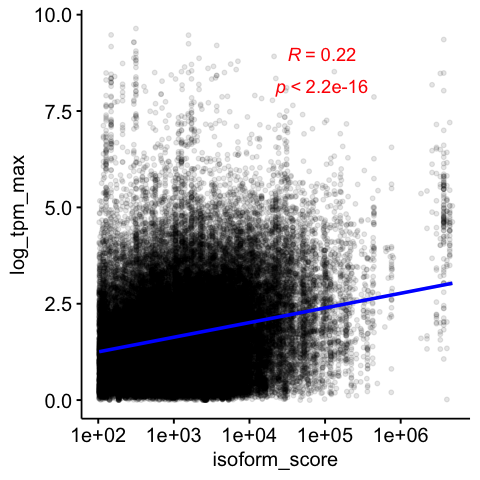

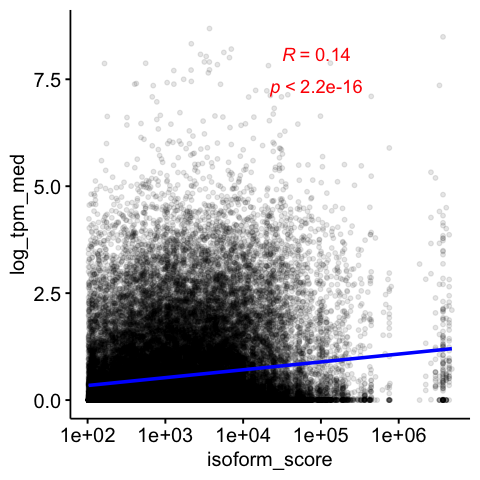

In [15]:
options(repr.plot.width=4, repr.plot.height=4)

## correlation with isoform expression
### max of GEUVADIS
elavl %>%
  dplyr::group_by(isoform) %>%
  dplyr::mutate(isoform_score = sum(pileup)) %>%
  dplyr::arrange(isoform) %>%
  as.data.frame() %>%
  dplyr::distinct(isoform,isoform_score,log_tpm_max) %>%
  ggscatter(., x = "isoform_score", y = "log_tpm_max",
            color = "black", size = 1, alpha = 0.1, 
            add = "reg.line",  
            add.params = list(color = "blue", fill = "lightgray"),
            conf.int = TRUE, 
            cor.coef = TRUE,
            cor.coeff.args = list(method = "pearson", label.x.npc = "center", label.y.npc = "top", label.sep = "\n", color="red")
  ) +
  scale_x_log10()

### median of GEUVADIS
elavl %>%
  dplyr::group_by(isoform) %>%
  dplyr::mutate(isoform_score = sum(pileup)) %>%
  dplyr::arrange(isoform) %>%
  as.data.frame() %>%
  dplyr::distinct(isoform,isoform_score,log_tpm_med) %>%
  ggscatter(., x = "isoform_score", y = "log_tpm_med",
            color = "black", size = 1, alpha = 0.1, 
            add = "reg.line",  
            add.params = list(color = "blue", fill = "lightgray"),
            conf.int = TRUE, 
            cor.coef = TRUE,
            cor.coeff.args = list(method = "pearson", label.x.npc = "center", label.y.npc = "top", label.sep = "\n", color="red")
  ) +
  scale_x_log10()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6118  3.3227  4.3295  4.4258  5.3825 11.9277 

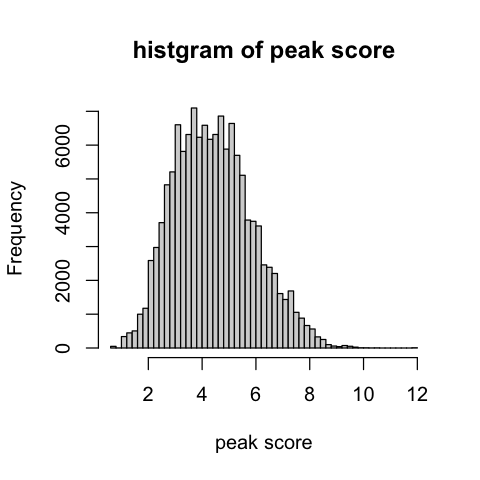

In [16]:
# summary of peak score
elavl %>%
  # dplyr::filter(log_tpm_med>0) %>%
  dplyr::distinct(isoform,region,peak_id,.keep_all = TRUE) %>%
  dplyr::mutate(adj_count = pileup/(log_tpm_med_sum+1),
                region = factor(region,levels=c("5UTR","CDS","3UTR","Intron"))) %>%
  dplyr::group_by(isoform,region) %>%
  dplyr::mutate(adj_count_sum = log(sum(adj_count)+1)) %>%
  dplyr::arrange(isoform,region) %>%
  as.data.frame() %>%
  dplyr::distinct(isoform,region,.keep_all = TRUE) %>%
  .$adj_count_sum %>%
  summary()

options(repr.plot.width=4, repr.plot.height=4)
elavl %>%
  # dplyr::filter(log_tpm_med>0) %>%
  dplyr::distinct(isoform,region,peak_id,.keep_all = TRUE) %>%
  dplyr::mutate(adj_count = pileup/(log_tpm_med_sum+1),
                region = factor(region,levels=c("5UTR","CDS","3UTR","Intron"))) %>%
  dplyr::group_by(isoform,region) %>%
  dplyr::mutate(adj_count_sum = log(sum(adj_count)+1)) %>%
  dplyr::arrange(isoform,region) %>%
  as.data.frame() %>%
  dplyr::distinct(isoform,region,.keep_all = TRUE) %>%
  .$adj_count_sum %>%
  hist(., breaks = 50, main = "histgram of peak score", xlab = "peak score")

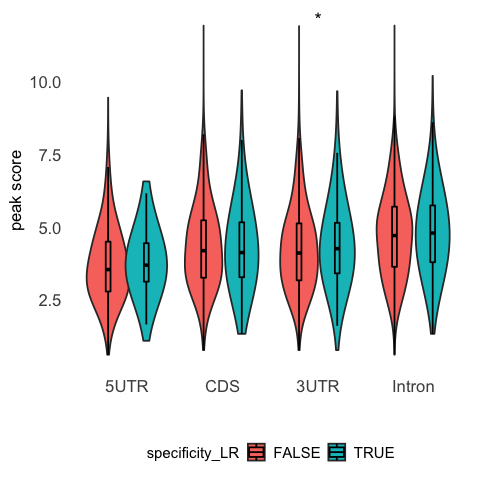

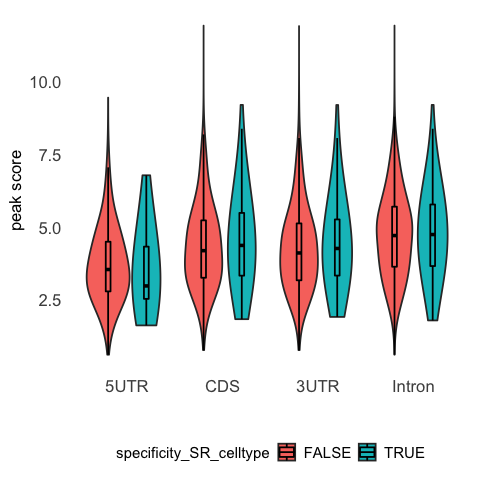

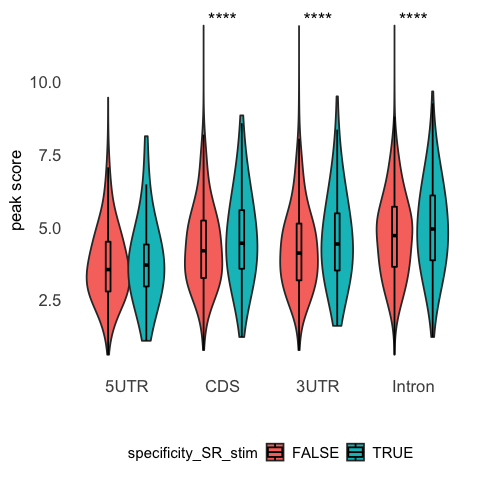

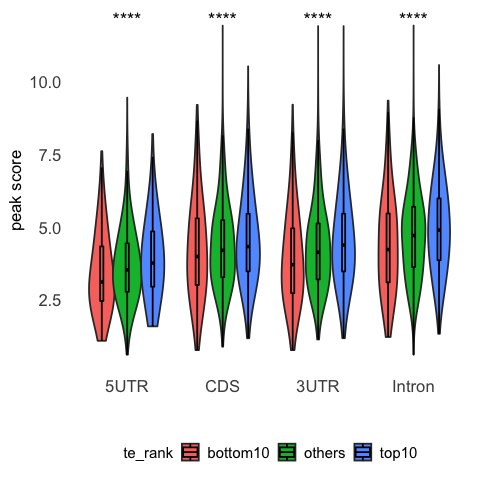

In [17]:
# compare peak scores according to specificity and translational efficiency
for (variable in c("specificity_LR","specificity_SR_celltype","specificity_SR_stim","te_rank")){
  num = grep(variable,c("specificity_LR","specificity_SR_celltype","specificity_SR_stim","te_rank"))+1
  g = elavl %>%
    # dplyr::filter(log_tpm_med>0) %>%
    dplyr::distinct(isoform,region,peak_id,.keep_all = TRUE) %>%
    dplyr::mutate(adj_count = pileup/(log_tpm_med_sum+1),
                  region = factor(region,levels=c("5UTR","CDS","3UTR","Intron"))) %>%
    dplyr::group_by(isoform,region) %>%
    dplyr::mutate(adj_count_sum = log(sum(adj_count)+1)) %>%
    dplyr::arrange(isoform,region) %>%
    as.data.frame() %>%
    dplyr::distinct(isoform,region,.keep_all = TRUE) %>%
    dplyr::filter(!is.na(eval(parse(text=variable)))) %>%
    ggplot(., aes(x=region, y=adj_count_sum, fill = eval(parse(text=variable)))) + 
    geom_violin(adjust=3, position = position_dodge(width = 0.8)) +
    geom_boxplot(width=0.1, color="black", na.rm = TRUE, outlier.shape = NA, position = position_dodge(width = 0.8)) +
    stat_compare_means(label = "p.signif",
                       label.x.npc = "center",
                       symnum.args = list(cutpoints = c(0, 0.0001, 0.001, 0.01, 0.05, 1), symbols = c("****", "***", "**", "*", ""))) +
    xlab("") +
    ylab("peak score") +
    labs(fill=variable) +
    theme_minimal() +
    theme(strip.text.x=element_text(size=9, color="black", face="bold"),
          strip.text.y=element_text(size=9, color="black", face="bold"),
          panel.grid=element_blank(),
          legend.position = "bottom",
          plot.title = element_text(size=10),
          axis.title.x = element_text(size=10),
          axis.title.y = element_text(size =10),
          axis.text.y = element_text(size = 10),
          axis.text.x = element_text(size = 10),
          legend.text =  element_text(size = 9), 
          legend.key.size = grid::unit(0.8, "lines"),
          legend.title = element_text(size = 9, hjust = 0))
  plot(g)
}